<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import HTML

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [326]:
df_hh_list = pd.read_csv(r'E:\Игорь\HH_ru\dst-3.0_16_1_hh_database.csv', encoding='utf-8', sep=';')

# df.head()  # Вывод первых строк для проверки данных


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [327]:
df_hh_list.head()  # Вывод первых строк для проверки данных

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

In [328]:
df_hh_list.shape  # Выводит количество строк и столбцов в таблице

(44744, 12)

In [329]:
df_hh_list['Опыт работы'].nunique()  # Выводит количество уникальных значений в столбце'Опыт работы'

44413

In [330]:
df_hh_list['Ищет работу на должность:'].value_counts().index[0]  # Выводит наиболее частое значение в столбце
df_hh_list['Ищет работу на должность:'].value_counts().head(10)  # Выводит 10 наиболее частых значений в столбце

Ищет работу на должность:
Системный администратор             3099
Инженер                              966
Аналитик                             809
Менеджер проектов                    745
Руководитель проекта                 718
Специалист технической поддержки     695
Руководитель проектов                669
Технический специалист               498
Программист                          475
Менеджер проекта                     471
Name: count, dtype: int64

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [331]:
df_hh_list.info()  # Вывод информации о DataFrame для проверки типов данных и наличия пропусков
# Проверка на наличие пропусков в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [332]:
#Столбцы с пропусками

print(df_hh_list.isnull().sum())  # Выводит количество пропусков в каждом столбце
print(df_hh_list.isnull().sum().sum())  # Выводит общее количество пропусков в DataFrame

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64
171


5. Выведите основную статистическую информацию о столбцах.


In [333]:
#Основная статистическая информация о столбцах
df_hh_list.describe(include='all')  # Выводит основную статистическую информацию о столбцах
# Проверка на наличие дубликатов в данных
# df_hh_list.duplicated().sum()  # Выводит количество дубликатов в данных

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 2014 Тюменский Государствен...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

In [334]:
# самая распространённая должность в столбце "Ищет работу на должность:"

df_hh_list['Ищет работу на должность:'].value_counts().index[0]

'Системный администратор'

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [335]:
# Обработка текста в столбце «Образование и ВУЗ»
def categorize_education(text):
    """
    Функция для категоризации уровня образования на основе текста
    
    args: text (str): текстовое описание уровня образования
    
    returns: str: категория образования
    
    """
    
    try:
        first_three_words = text.split()[:3]
        education_level = " ".join(first_three_words)

        if "Высшее" in education_level:
            return "высшее"
        elif "Неоконченное высшее" in education_level:
            return "неоконченное высшее"
        elif "среднее специальное" in education_level.lower():
            return "среднее специальное"
        elif "среднее" in education_level.lower():
            return "среднее"
        else:
            return "unknown"  # Обработка случаев, когда уровень образования не попал
                              # в, проверяемый список.
    except AttributeError:  # Обработка потенциальных значений None или неизвестных
                            # типов входных данных
      return "unknown"


df_hh_list['Образование'] = df_hh_list['Образование и ВУЗ'].apply(categorize_education)
print(df_hh_list['Образование'].unique())

# Расчет количества соискателей с уронем среднего образования
secondary_education_count = len(df_hh_list[df_hh_list['Образование'] == 'среднее'])

print(f"Количество соискателей со средним образованием: {secondary_education_count}")

# удаление Образование и ВУЗ
df_hh_list = df_hh_list.drop(columns=['Образование и ВУЗ'])
df_hh_list.head()

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']
Количество соискателей со средним образованием: 559


Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   
2                               Кассир-операционист  16.04.2019 08:35   
3                               Инженер-программист  08.04.2019 14:23   
4                              Менеджер по продажам  22.04.2019 10:32   

                             Авто          Образование  
0  Имеется собственный автомобиль  неоконченное высшее  
1                      Не указано               высшее  
2                      Не указано  среднее специальное  
3                      Не указано               высшее  
4                      Не указано               высшее

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [336]:
# Преобразование столбца 'Пол, возраст'
def process_gender_age(text):
    """ Преобразование строки 'Пол, возраст' в два столбца  "Пол" и "Возраст".

    Args: experience_str: A строка передставляющая пол и возраст (например, "Мужчина, 39 лет").

    Returns: Пол  - два уникальных значения М или Ж, Возраст - целое число.
    """
    
    try:
        parts = text.split(' ')
        # print(parts)
        gender = parts[0]
        age_str = parts[3]
        # print(age_str)
        age_str = age_str.split(' ')
        age_str = age_str[0]
        # print(age_str)

        if gender == 'Мужчина':
          gender = 'М'
        elif gender == 'Женщина':
          gender = 'Ж'
        else:
          gender = 'Unknown'

        age = int(age_str)
        return gender, age
    except (IndexError, ValueError):
        return 'Unknown', -1  # Возврат 'Unknown' и -1 для некорректных значений

# Применение функции к столбцу и создание новых признаков
df_hh_list[['Пол', 'Возраст']] = df_hh_list['Пол, возраст'].apply(process_gender_age).apply(pd.Series)

# Удаление столбца 'Пол, возраст'
df_hh_list = df_hh_list.drop(columns=['Пол, возраст'])

# Расчет процента женских резюме
female_percent = (df_hh_list['Пол'].value_counts(normalize=True) * 100)['Ж']
print(f"Процент женских резюме: {female_percent:.2f}%")

# Расчет среднего возраста соискателей
average_age = df_hh_list['Возраст'].mean()
print(f"Средний возраст соискателей: {average_age:.1f}")

df_hh_list.shape

Процент женских резюме: 19.07%
Средний возраст соискателей: 32.2


(44744, 13)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [337]:
def experience_to_months(experience_str):
    """
    Преобразование строки опыта год/мес в месяцы.

    Args:
      experience_str: A строка передставляющая опыт (e.g., "Опыт работы 3 года 2 месяца").

    Returns:
      Опыт работы в месяцах в виде целого числа, или NaN, если входные данные недействительны или отсутствуют.
    """
    if pd.isna(experience_str) or experience_str.lower() == 'не указано':
        return np.nan # возврат если данных в ячейке нет

    try:
        parts = experience_str.split()[2:6] # выделяет из строки позиции, где указаны количество лет и месяцев общего стажа
    # print(parts)
        years = 0
        months = 0
    # Цикл, проверяющий есть ли в стороке записи "xx месяц(ев/а)" и "yy год(а)/лет" с присвоением переменным years & month соответсвующих значений
        for i, part in enumerate(parts):
            if part.isdigit() and int(part) < 100:
                if i == 3 and part != 'месяцев' and part != 'месяц' and part != 'месяца':
                    break # выход из цикла если последнее значение строки parts не указывает на месяц
                if i + 1 < len(parts) and parts[i+1].lower() == 'год' or parts[i+1].lower() == 'года' or parts[i+1].lower() == 'лет':
                    years = int(part) # Присвоение значения переменной years
                elif i + 1 < len(parts) and parts[i+1].lower() == 'месяц' or parts[i+1].lower() == 'месяца' or parts[i+1].lower() == 'месяцев':
                    months = int(part) # Присвоение значения переменной months
        return int(years * 12 + months) # вычисление и возврат значение стажа в меяцах
    except (ValueError, IndexError):
        return np.nan # Обработка исключения, если в строке parts  не найдено указаний и на год, и на месяц


# Вызов функции experience_to_months и создание столбца 'Опыт работы (месяц)'
df_hh_list['Опыт работы (месяц)'] = df_hh_list['Опыт работы'].apply(experience_to_months)

# медианный опыт работы (в месяцах)
median_job_exp = df_hh_list['Опыт работы (месяц)'].median()
print(f"Медианный опыт работы (в месяцах): {median_job_exp}")

# Удаление 'Опыт работы'
df_hh_list = df_hh_list.drop('Опыт работы', axis=1)
df_hh_list.head()
df_hh_list['Опыт работы (месяц)'].describe()  # Выводит основную статистическую информацию о столбце 'Опыт работы (месяц)'

Медианный опыт работы (в месяцах): 100.0


count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [338]:
# Города милионники
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для определения, категории города
def is_million_city(city):
    """
    Проверяет, является ли город Москва, СПБ, миллионник или иное.

    Args:
        city: Название города.

    Returns:
        Категоприя города (Москва, СПБ, миллионник, иное).
    """
    if pd.isna(city):
        return 'Unknown'  # Возврат 'Unknown' для пустых значений
    city = city.split(',')[0].strip()  # Извлечение названия города из строки
    if city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'  # Возврат 'другие' для городов, не попадающих в указанные категории
    
# Применение функции к столбцу 'Город'
df_hh_list['Город'] = df_hh_list['Город, переезд, командировки'].apply(is_million_city)

def extract_relocation_willingness(relocation_str):
    """
    Извлечение информации о готовности к переезду 

    Args:
        text: Строка, содержащая информацию о переезде 

    Returns:
        Готовность к переезду (True/False) и готовность (True/False).
    """
    if pd.isna(relocation_str):
        return "unknown"  # Обработка отсутствующих значений

    city_reloc_info_1 = relocation_str.split(',')[1].strip()
    city_reloc_info_2 = relocation_str.split(',')[2].strip()
    if city_reloc_info_1.startswith("м. "):
        city_reloc_info = city_reloc_info_2
    else:
        city_reloc_info = city_reloc_info_1
    # print(city_reloc_info)
    if "не готов" in city_reloc_info.lower():
        return False
    else:
        return True

# Применение функции к столбцу 'Город, переезд, командировки' и создание нового столбца 'Готовность к переезду'
df_hh_list['Готовность к переезду'] = df_hh_list['Город, переезд, командировки'].apply(extract_relocation_willingness)

def extract_business_trip_willingness(business_trip_str):
    """
    Извлечение информации о готовности к командировкам.

    Args:
        text: Строка, содержащая информацию о командировках.

    Returns:
        Готовность к командировкам (True/False).
    """
    if pd.isna(business_trip_str):
        return "unknown"  # Обработка отсутствующих значений

    business_trip_willingness = business_trip_str.split(',')[-1].strip()
    # print(business_trip_willingness)
    if "не готов" in business_trip_willingness.lower():
        return False
    else:
        return True
 
# Применение функции к столбцу 'Город, переезд, командировки' и создание нового столбца 'Готовность к командировкам'   
df_hh_list['Готовность к командировкам'] = df_hh_list['Город, переезд, командировки'].apply(extract_business_trip_willingness)

# Удаление столбца 'Город, переезд, командировки'
df_hh_list = df_hh_list.drop(columns=['Город, переезд, командировки'])

# Количество соискателей из Санкт-Петербурга
spb_applicants = len(df_hh_list[df_hh_list['Город'] == 'Санкт-Петербург'])

# Всего соискателей
total_applicants = len(df_hh_list)

# Расчёт процента соискателей, живущих в Санкт-Петербурге
spb_percentage = round((spb_applicants / total_applicants) * 100)

# Расчёт количества соискателей, готовых переехать и поехать в командировки
both_willing = len(df_hh_list[(df_hh_list['Готовность к переезду'] == True) & (df_hh_list['Готовность к командировкам'] == True)])

# Расчёт процента соискателей, готовых переезду и командировкам
percentage_both_willing = round((both_willing / total_applicants) * 100)


print(f"Процент соискателей, проживающих в Санкт-Петербурге: {spb_percentage}%")
print(f"Процент соискателей, готовых к переездам и командировкам: {percentage_both_willing}%")


df_hh_list.shape  # Выводит количество строк и столбцов в таблице после обработки данных

Процент соискателей, проживающих в Санкт-Петербурге: 11%
Процент соискателей, готовых к переездам и командировкам: 32%


(44744, 15)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [339]:
# Создание уникальных значений для столбца 'Занятость'
unique_occupations = [] # Создаём пустой список, куда будем заносить уникальные значения
# Цикл по ячейкам столбца 'Занятость'
for occupations_str in df_hh_list['Занятость']:
    try:
        # Разделяем по запятой значения в ячейках столбца "Занятость"
        occupations = occupations_str.split(',')
        # циклом проходим по всем значениям в ячейке
        for occupation in occupations:
            occupation = occupation.strip()
            # если значение отсутствует в списке unique_occupations, добавляем его
            if occupation not in unique_occupations:
                unique_occupations.append(occupation)
    except AttributeError:
        pass # Обработка случаев, когда 'Занятость' == NaN

# Создание новых столбцов на основе списка "unique_occupations"
for occupation in unique_occupations:
    df_hh_list[occupation] = df_hh_list['Занятость'].str.contains(occupation, na=False)

#  Создание уникальных значений для столбца 'График'
unique_schedules = [] # Создаём пустой список, куда будем заносить уникальные значения
# Цикл по ячейкам столбца 'График'
for schedule_str in df_hh_list['График']:
    try:
        # Разделяем по запятой значения в ячейках столбца 'График'
        schedules = schedule_str.split(',')
        # циклом проходим по всем значениям в ячейке
        for schedule in schedules:
            schedule = schedule.strip()
            # если значение отсутствует в списке unique_occupations, добавляем его
            if schedule not in unique_schedules:
                unique_schedules.append(schedule)
    except AttributeError:
        pass  # Обработка случаев, когда 'График' == NaN

# Создание новых столбцов на основе списка "unique_schedules"
for schedules in unique_schedules:
    df_hh_list[schedules] = df_hh_list['График'].str.contains(schedules, na=False)
     

print(unique_occupations, unique_schedules) # Вывод уникальных значений для проверки

df_hh_list = df_hh_list.drop(columns=['Занятость', 'График']) # Удаление старых столбцов 'Занятость' и 'График'

# Расчет количества людей, ищущих проектную работу и волонтерство
project_volunteer_count = len(df_hh_list[(df_hh_list['проектная работа'] == True) & (df_hh_list['волонтерство'] == True)])
print(f"Количество людей, ищущих проектную работу и волонтерство: {project_volunteer_count}")

# Расчет количества людей, желающих работать вахтовым методом и иметь гибкий график
shift_flexible_count = len(df_hh_list[(df_hh_list['вахтовый метод'] == True) & (df_hh_list['гибкий график'] == True)])
print(f"Количество, желающих работать вахтовым методом и иметь гибкий график: {shift_flexible_count}")

df_hh_list.shape  # Выводит количество строк и столбцов в таблице после обработки данных


['частичная занятость', 'проектная работа', 'полная занятость', 'стажировка', 'волонтерство'] ['гибкий график', 'полный день', 'сменный график', 'вахтовый метод', 'удаленная работа']
Количество людей, ищущих проектную работу и волонтерство: 436
Количество, желающих работать вахтовым методом и иметь гибкий график: 2311


(44744, 23)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [340]:
# Загрузка данных из CSV файла с курсами валют
df_exchange_rates = pd.read_csv(r"E:\Игорь\HH_ru\ExchangeRates.csv", sep=',', encoding='utf-8')

df_exchange_rates.head()  # Вывод первых строк для проверки данных

# Преобразование столбца 'date' в формат datetime objects
df_exchange_rates['date'] = pd.to_datetime(df_exchange_rates['date'], format='%d/%m/%y')

# Выделение даты
df_exchange_rates['date'] = df_exchange_rates['date'].dt.date
df_exchange_rates.head()

# Преобразование данных о номинале зарплаты из столбца 'ЗП' в числовой формат
def salary_extract(salary_str):
    """
    Извлечение зарплаты из строки.

    Args:
        salary_str: Строка, содержащая информацию о зарплате (например, "от 100000 до 150000").

    Returns:
        Номинал зарплаты.
    """
    if pd.isna(salary_str):
        return np.nan, np.nan  # Возврат NaN для пустых значений

    try:
        salary = salary_str.split()[0] # Извлечение первой части строки
        
        return salary
    except (IndexError, ValueError):
        return np.nan, np.nan  # Возврат NaN для некорректных значений
    
# Применение функции к столбцу 'Зарплата' и создание нового столбца 'Зарплата (число)'
df_hh_list['Номинал ЗП'] = df_hh_list['ЗП'].apply(salary_extract)
df_hh_list.head()

# извлечение из столбца "ЗП" данных о валютах и преобразование их в международный формат
def currency_extract(salary_str):
    """
    Извлечение валюты из строки.

    Args:
        salary_str: Строка, содержащая информацию о зарплате (например, "от 100000 до 150000").

    Returns:
        Валюта.
    """
    if pd.isna(salary_str):
        return np.nan  # Возврат NaN для пустых значений

    try:
        currency = salary_str.split()[1].replace('.', '') # Извлечение первой части строки
        if currency == 'руб':
            currency = 'RUB'
        elif currency == 'USD':
            currency = 'USD'
        elif currency == 'EUR':
            currency = 'EUR'
        elif currency == 'KZT':
            currency = 'KZT'
        elif currency == 'белруб':
            currency = 'BYN'
        elif currency == 'грн':
            currency = 'UAH'
        elif currency == 'сум':
            currency = 'UZS'
        elif currency == 'KGS':
            currency = 'KGS'
        elif currency == 'AZN':
            currency = 'AZN'
        else:
            currency = 'unknown'  # Обработка случаев, когда валюта не попала в проверяемый список.
        return currency
    except (IndexError, ValueError):
        return np.nan  # Возврат NaN для некорректных значений
# Применение функции к столбцу 'Зарплата' и создание нового столбца 'Валюта'
df_hh_list['Валюта'] = df_hh_list['ЗП'].apply(currency_extract)

# Преобразование 'Обновление резюме' в datetime и выделение из него даты
df_hh_list['Обновление резюме'] = pd.to_datetime(df_hh_list['Обновление резюме']).dt.date

# Объединение dataframes 'df_hh_list' по параметрам 'Валюта' и 'Обновление резюме' & 'df_exchange_rates' по параметрам 'currency' и 'date'
df_hh_list = pd.merge(df_hh_list, df_exchange_rates, left_on=['Валюта', 'Обновление резюме'], right_on=['currency', 'date'], how='left')
# Установка'close' и 'proportion' в 1 в случае 'Валюта' == 'RUB'
df_hh_list.loc[df_hh_list['Валюта'] == 'RUB', ['close', 'proportion']] = 1

# Преобразование 'Номинал ЗП', 'close' и 'proportion' в числовой формат
df_hh_list['Номинал ЗП'] = pd.to_numeric(df_hh_list['Номинал ЗП'], errors='coerce')
df_hh_list['close'] = pd.to_numeric(df_hh_list['close'], errors='coerce')
df_hh_list['proportion'] = pd.to_numeric(df_hh_list['proportion'], errors='coerce')

# Расчет зарплаты в рублях в соответствии с текущим курсом валюты
df_hh_list['ЗП (руб)'] = df_hh_list['Номинал ЗП'] * df_hh_list['close'] / df_hh_list['proportion']

# Удаление ненужных столбцов 'currency', 'per', 'date', 'time', 'vol', 'Номинал ЗП', 'Валюта', 'close', 'proportion'
df_hh_list = df_hh_list.drop(columns=['currency', 'per', 'date', 'time', 'vol', 'Номинал ЗП', 'Валюта', 'close', 'proportion'])

# вычисление медианной зарплаты по всем резюме
median_salary = df_hh_list['ЗП (руб)'].median()
print(f"Медианная зарплата по всем резюме: {median_salary:.2f} руб.")

df_hh_list.shape  # Выводит количество строк и столбцов в таблице после обработки данных






Медианная зарплата по всем резюме: 59019.00 руб.


D:\Temp\ipykernel_19300\2635761002.py:81: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



(44744, 24)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

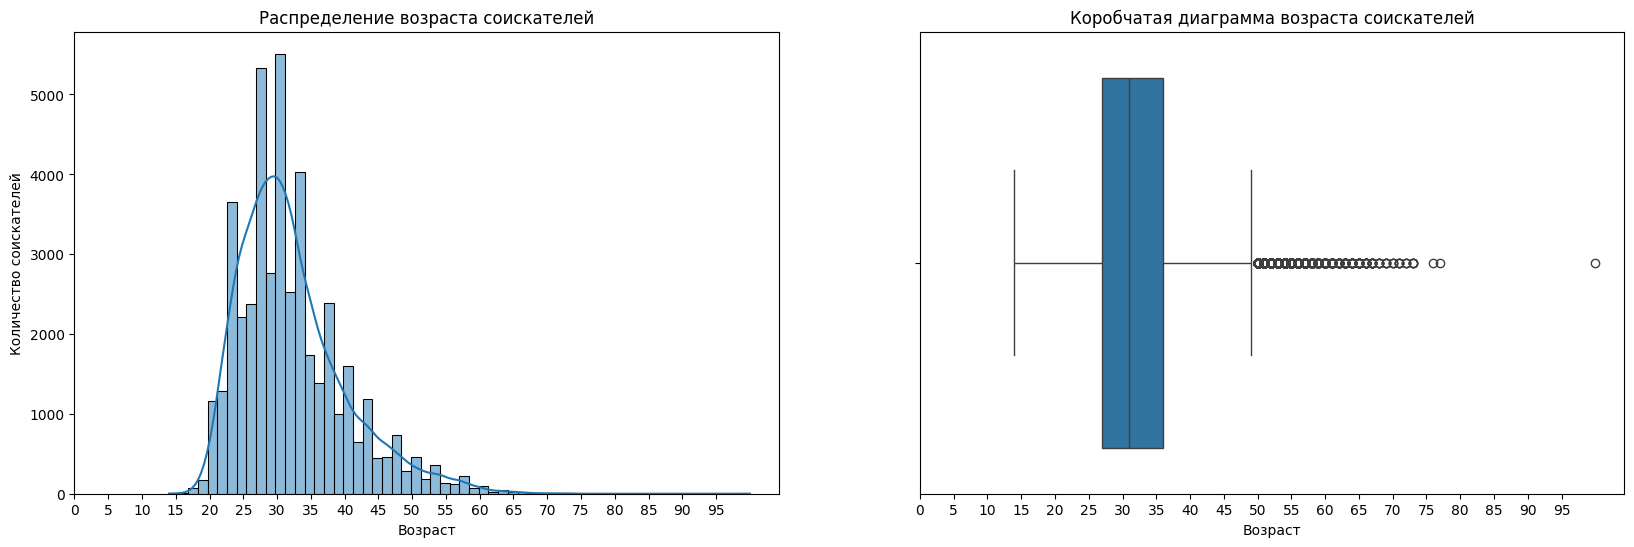

Мода возраста соискателей: 30 лет
Минимальный возраст соискателей: 14 лет
Максимальный возраст соискателей: 100 лет
Возраст большинства соискателей находится в интервале от 27.0 до 36.0 лет
Количество аномальных значений возраста: 35
Аномальные значения возраста: [ 72  16  71  17  73  77  76  14  15 100]
Возраст соискателей выше 48.0 лет и ниже 22.0 лет выходит за рамки 90% доверительного интервала


In [341]:
# Построение распределение признака «Возраст». в виде гистограммы и коробчатой диаграммы
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_hh_list['Возраст'], bins=60, kde=True)
plt.xticks(np.arange(0, 100, 5)) # Установка делений по оси X с шагом 5 лет
plt.title('Распределение возраста соискателей')
plt.xlabel('Возраст')
plt.ylabel('Количество соискателей')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_hh_list['Возраст'])
plt.xticks(np.arange(0, 100, 5))  # Установка делений по оси X с шагом 5 лет
plt.title('Коробчатая диаграмма возраста соискателей')
plt.xlabel('Возраст')
plt.show()

# Описание распределения
# Мода распределения
mode_age = df_hh_list['Возраст'].mode()[0]
print(f"Мода возраста соискателей: {mode_age} лет")

# Минимальный и максималный возраст
min_age = df_hh_list['Возраст'].min()
max_age = df_hh_list['Возраст'].max()
print(f"Минимальный возраст соискателей: {min_age} лет\nМаксимальный возраст соискателей: {max_age} лет")

# Возраст соискателей по квантилям
quantiles_age = df_hh_list['Возраст'].quantile([0.25, 0.5, 0.75])
print(f"Возраст большинства соискателей находится в интервале от {df_hh_list['Возраст'].quantile(0.25)} до {df_hh_list['Возраст'].quantile(0.75)} лет")

# Аномалии (возраст меньше 18 или больше 70)
anomalies_age = df_hh_list[(df_hh_list['Возраст'] < 18) | (df_hh_list['Возраст'] > 70)]
print(f"Количество аномальных значений возраста: {len(anomalies_age)}")
print(f"Аномальные значения возраста: {anomalies_age['Возраст'].unique()}")

age_upper_limit = df_hh_list['Возраст'].quantile(0.95)  # 95-й процентиль
age_lower_limit = df_hh_list['Возраст'].quantile(0.05)  # 5-й процентиль
print(f"Возраст соискателей выше {age_upper_limit} лет и ниже {age_lower_limit} лет выходит за рамки 90% доверительного интервала")

ваши выводы по графику здесь

### Выводы по графикам распределения возраста соискателей
1. Половина соискателей находятся в возрасте от 27 до 36 лет. У 90% соискателей возраст в пределах от 22 до 48 лет,  что соответствует возрасту наиболее активного населения.
2. Мода возраста соискателей составляет 30 лет
3. Минимальный возраст соискателей составляет 14 лет, а максимальный - 100 лет.
4. Аномальные значения возраста (меньше 18 или больше 70 лет) составляют небольшую долю от общего числа соискателей - 35 соискателей.
5. Коробчатая диаграмма показывает наличие выбросов, которые могут быть связаны с ошибками в данных, например 100 лет или реальными аномалиями - 70 и более лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

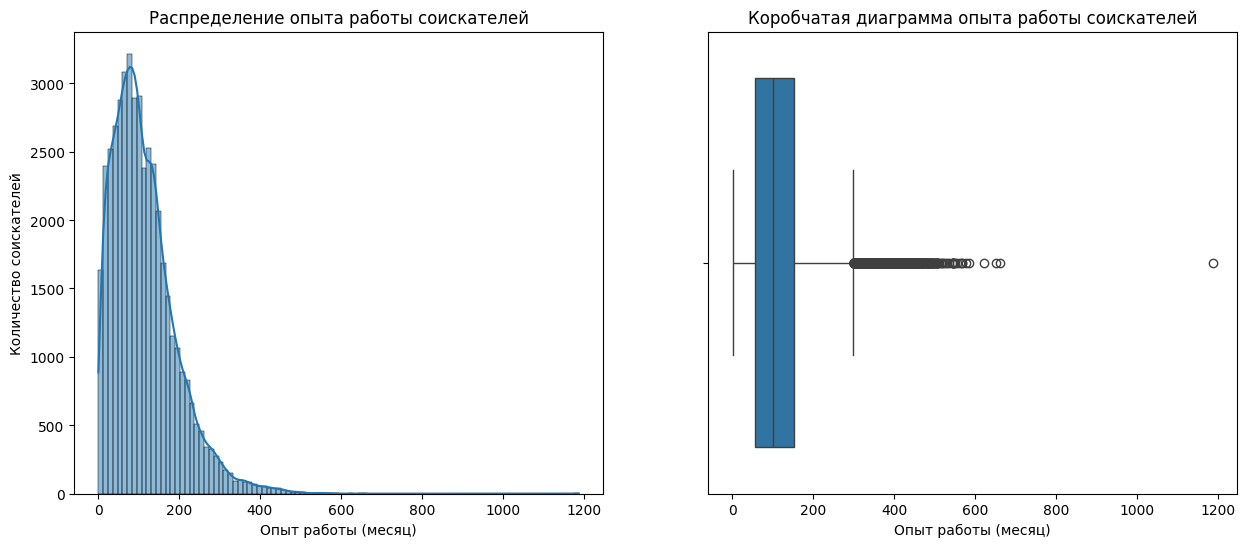

Мода опыта работы соискателей: 81.0 месяцев
Минимальный опыт работы соискателей: 1.0 месяцев
Максимальный опыт работы соискателей: 1188.0 месяцев
Опыт работы большинства соискателей находится в интервале от 57.0 до 154.0 месяцев
Количество аномальных значений опыта работы: 4
Аномальные значения опыта работы: [ 663.  653. 1188.  622.]
Опыт работы соискателей в пределах от 16.0 до 264.0 месяцев имеет 90% соискатеклей


In [342]:
# Построение распределение признака «Опыт работы (месяц)». в виде гистограммы и коробчатой диаграммы на одном графике
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_hh_list['Опыт работы (месяц)'], bins=100, kde=True)
plt.title('Распределение опыта работы соискателей')
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Количество соискателей')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_hh_list['Опыт работы (месяц)'])
plt.title('Коробчатая диаграмма опыта работы соискателей')
plt.xlabel('Опыт работы (месяц)')
plt.show()

# Описание распределения
# Мода распределения
mode_exp = df_hh_list['Опыт работы (месяц)'].mode()[0]
print(f"Мода опыта работы соискателей: {mode_exp} месяцев")

# Минимальный и максималный опыт работы
min_exp = df_hh_list['Опыт работы (месяц)'].min()
max_exp = df_hh_list['Опыт работы (месяц)'].max()
print(f"Минимальный опыт работы соискателей: {min_exp} месяцев\nМаксимальный опыт работы соискателей: {max_exp} месяцев")

# Опыт работы соискателей по квантилям
quantiles_exp = df_hh_list['Опыт работы (месяц)'].quantile([0.25, 0.5, 0.75])
print(f"Опыт работы большинства соискателей находится в интервале от {df_hh_list['Опыт работы (месяц)'].quantile(0.25)} до {df_hh_list['Опыт работы (месяц)'].quantile(0.75)} месяцев")
# Аномалии (опыт работы меньше 0 или больше 50 лет)
anomalies_exp = df_hh_list[(df_hh_list['Опыт работы (месяц)'] < 0) | (df_hh_list['Опыт работы (месяц)'] > 600)]
print(f"Количество аномальных значений опыта работы: {len(anomalies_exp)}")
print(f"Аномальные значения опыта работы: {anomalies_exp['Опыт работы (месяц)'].unique()}")
# 95-й процентиль
exp_upper_limit = df_hh_list['Опыт работы (месяц)'].quantile(0.95)  # 95-й процентиль
# 5-й процентиль
exp_lower_limit = df_hh_list['Опыт работы (месяц)'].quantile(0.05)  # 5-й процентиль
print(f"Опыт работы соискателей в пределах от {exp_lower_limit} до {exp_upper_limit} месяцев имеет 90% соискатеклей")



### Выводы по графикам "Опыт работы"

1. Опыт работы большинства соискателей составляет от 57 до 154 месяцев или 5 - 13 лет.
2. У 90% соискателей опыт работы составляет от 16 до 264 месяцев или от года до 22 лет и эти цифры кореллируются с возрастом соискателй и также подтверждается графиком "Зависимость опыта работы от возраста", приведённом ниже. 
3. Наблюдается небольшое количество аномальных зхначений, 4 шт. (опыт работы свыше 600 мес. или 50 лет), но их влияние незначительно и ими можно пренебречь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


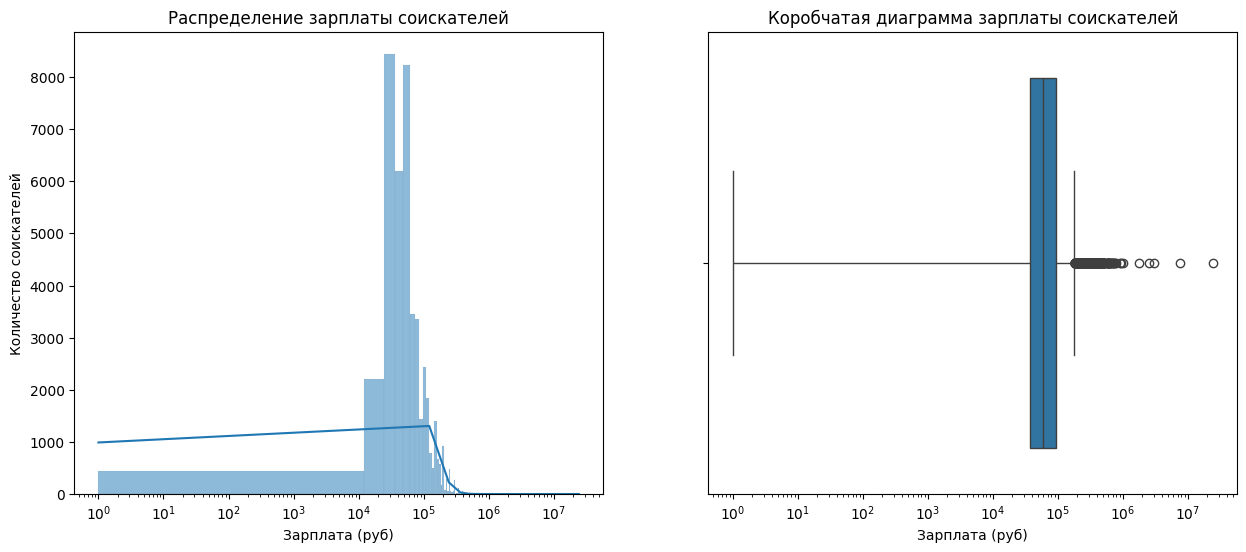

Мода зарплаты соискателей: 50000.0 руб.
Минимальная зарплата соискателей: 1.0 руб.
Максимальная зарплата соискателей: 24304876.0 руб.
Зарплата большинства соискателей находится в интервале от 37082.2 до 95000.0 руб.
Количество аномальных значений зарплаты: 89
Количество соискателей с зарплатой больше 1 млн. руб.: 5
Зарплата соискателей в пределах от 20000.0 до 200000.0 рублей имеет 90% соискателей


In [343]:
# Построение распределение признака «ЗП (руб)». в виде гистограммы и коробчатой диаграммы на одном графике шкала зарплаты логарифмическая

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_hh_list['ЗП (руб)'], bins=2000, kde=True)
plt.xscale('log')
plt.title('Распределение зарплаты соискателей')
plt.xlabel('Зарплата (руб)')

plt.ylabel('Количество соискателей')
plt.subplot(1, 2, 2)
sns.boxplot(x=df_hh_list['ЗП (руб)'])
plt.xscale('log')
plt.title('Коробчатая диаграмма зарплаты соискателей')
plt.xlabel('Зарплата (руб)')
plt.show()

# Построение распределение признака «ЗП (руб)». в виде гистограммы и boxplot диаграммы на одном графике шкала зарплаты логарифмическая

fig = px.box(df_hh_list, y='ЗП (руб)', log_y=True, title='Коробчатая диаграмма зарплаты соискателей')
fig.update_layout(xaxis_title='Зарплата (руб)', yaxis_title='Количество соискателей')
fig.update_layout(width=800, height=400)  # размер графика

# Сохраняем график в файл jpeg
# fig.write_image("scatter_plot.png", format='png', width=800, height=400, engine="kaleido")  

fig.show()
# Сохранение графика в файл html
fig.write_html("salary_box_plot.html", include_plotlyjs='cdn')  # Сохранение графика в файл html



# Описание распределения
# Мода распределения
mode_salary = df_hh_list['ЗП (руб)'].mode()[0]
print(f"Мода зарплаты соискателей: {mode_salary} руб.")
# Минимальная и максимальная зарплата
min_salary = df_hh_list['ЗП (руб)'].min()
max_salary = df_hh_list['ЗП (руб)'].max()
print(f"Минимальная зарплата соискателей: {min_salary} руб.\nМаксимальная зарплата соискателей: {max_salary} руб.")
# Зарплата соискателей по квантилям
quantiles_salary = df_hh_list['ЗП (руб)'].quantile([0.25, 0.5, 0.75])
print(f"Зарплата большинства соискателей находится в интервале от {df_hh_list['ЗП (руб)'].quantile(0.25)} до {df_hh_list['ЗП (руб)'].quantile(0.75)} руб.")
# Аномалии (зарплата меньше 0 или больше 1 млн. руб.)
anomalies_salary = df_hh_list[(df_hh_list['ЗП (руб)'] < 1000) | (df_hh_list['ЗП (руб)'] > 1000000)]
print(f"Количество аномальных значений зарплаты: {len(anomalies_salary)}")
# print(f"Аномальные значения зарплаты: {anomalies_salary['ЗП (руб)'].unique()}")

million_salary = df_hh_list[df_hh_list['ЗП (руб)'] > 1000000]
print(f"Количество соискателей с зарплатой больше 1 млн. руб.: {len(million_salary)}")

salary_lower_limit = df_hh_list['ЗП (руб)'].quantile(0.05)  # 5-й процентиль
salary_upper_limit = df_hh_list['ЗП (руб)'].quantile(0.95)  # 95-й процентиль
print(f"Зарплата соискателей в пределах от {salary_lower_limit} до {salary_upper_limit} рублей имеет 90% соискателей")

### Выводы по графикам распределения зраплаты

1. Мода и медиана зарплаты соискателей составляют 50 000 Р и 59 019 Р соответственно.
2. 50% соискателей ищут зарплату в интервале от 37 082 до 95 000 Р
3. 90% соискателей ищут зарплату в интервале от 20 000 до 200 000 Р
4. Минимальная и максимальная зарплата составляет 1 и 24 304 876 Р соответственно, количество соискателей с зарплатой более 1 000 000 Р - 5, менее 1 000 Р - 84 и эти цифры выглядят аномальными. На грфике ниже 'Распределение зарплаты соискателей до 10 000 рублей'
хорошо виден всплеск в околонулевых значениях.


Количество соискателей с зарплатой меньше 10 000 рублей: 211
Количество соискателей с зарплатой меньше 1 000 рублей: 84


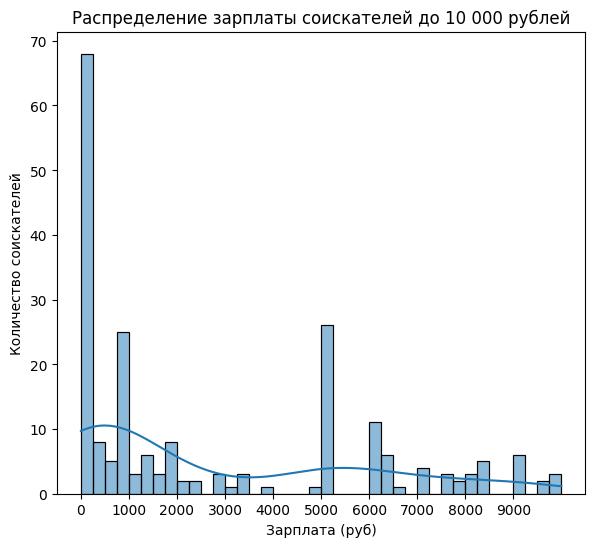

In [344]:
# фильтрация по зарплате желаемая зарплата меньше 10000 рублей
ten_thousand_df = df_hh_list[df_hh_list['ЗП (руб)'] < 10000] # удаление соискателей с зарплатой больше 10 000 рублей
thousand_df = df_hh_list[df_hh_list['ЗП (руб)'] < 1000] # удаление соискателей с зарплатой больше 1 000 рублей
# гистограмма по зарплате соискателей ten_thousand_df по оси x зарплата, по оси y количество соискателей
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(ten_thousand_df['ЗП (руб)'], bins=40, kde=True)
# plt.xscale('log')
plt.title('Распределение зарплаты соискателей до 10 000 рублей')

plt.xticks(np.arange(0, 10000, 1000)) # Установка делений по оси X с шагом 1000 рублей
plt.xlabel('Зарплата (руб)')
plt.ylabel('Количество соискателей')
# количество соискателей с зарплатой меньше 10 000 рублей   
print(f"Количество соискателей с зарплатой меньше 10 000 рублей: {len(ten_thousand_df)}")
print(f"Количество соискателей с зарплатой меньше 1 000 рублей: {len(thousand_df)}")



4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [360]:
# Фильтрация данных: желаемая зарплата меньше 1 миллиона рублей
filtered_df = df_hh_list[df_hh_list['ЗП (руб)'] < 1000000]

# boxplot диаграмма, которая показывает зависимость медианной желаемой заработной платы («ЗП (руб)») от уровня образования («Образование»)
fig = px.box(filtered_df, 
             x='Образование', 
             y='ЗП (руб)', 
             title='Зависимость медианной желаемой заработной платы от уровня образования'
             )
fig.update_layout(
    xaxis_title='Образование', 
    yaxis_title='Зарплата (руб)'
    )
# Размер графика 1200x600 пикселей
fig.update_layout(width=1000, height=800)

fig.show()

# Сохранение графика в файл html
fig.write_html("salary_education_box_plot.html", include_plotlyjs='cdn')  # Сохранение графика в файл html

# расчет медианной зарплаты по уровням образования
median_salary_by_education = df_hh_list.groupby('Образование')['ЗП (руб)'].median()
print(f"Медианная зарплата по уровням образования:\n{median_salary_by_education}")

# расчет quantile 0.25, 0.75 lower fence & upper fence по уровням образования
q1_salary_by_education = df_hh_list.groupby('Образование')['ЗП (руб)'].quantile(0.25)
q3_salary_by_education = df_hh_list.groupby('Образование')['ЗП (руб)'].quantile(0.75)


print(f"Quantile 0.25 по уровням образования:\n{q1_salary_by_education }")
print(f"Quantile 0.75 по уровням образования:\n{q3_salary_by_education}")


Медианная зарплата по уровням образования:
Образование
высшее                 60000.0
неоконченное высшее    50000.0
среднее                40000.0
среднее специальное    40000.0
Name: ЗП (руб), dtype: float64
Quantile 0.25 по уровням образования:
Образование
высшее                 40000.0
неоконченное высшее    33736.0
среднее                30000.0
среднее специальное    30000.0
Name: ЗП (руб), dtype: float64
Quantile 0.75 по уровням образования:
Образование
высшее                 100000.0
неоконченное высшее     70000.0
среднее                 60000.0
среднее специальное     50000.0
Name: ЗП (руб), dtype: float64


### Выводы по графикам распределения зарплаты по уровням образования

1. Явными лидерами по желаемой ЗП являются специалисты с высшим образованием, их медианная зарплата на 10 000 Р выше чем у специалистов с неоконченным высшим, и на 20 000 Р выше чем у специалистов со средним и среднним специальным.
2. Также у специалистов с высшим образованием на много больше разброс по 75 квантилю и  врхней границе (upper fence) 
3. Вторыми в рейтинге идут специалисты с неоконченным высшим образованием
4. Замыкают рейтинг среднее и среднее специальное образование и если по медиане и Q1 междe ними равенство, то по верхнему разбросу у специалистов со средним образованием, желаемый уровень зарплаты несколько выше.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [361]:
import plotly.express as px
# Фильтрация данных: желаемая зарплата меньше 1 миллиона рублей
filtered_df = df_hh_list[df_hh_list['ЗП (руб)'] < 1000000]

# Построение boxplot диаграммы, которая показывает зависимость медианной желаемой заработной платы («ЗП (руб)») от города проживания соискателя («Город») 

fig = px.box(df_hh_list, x='Город', y='ЗП (руб)', log_y=True, title='Зависимость медианной желаемой заработной платы от города проживания соискателя')  
fig.update_layout(xaxis_title='Город', yaxis_title='Зарплата (руб)', xaxis_tickangle=-45)

fig.update_layout(width=900, height=900)  # Установка размера графика
fig.show()

# Сохранение графика в файл html
fig.write_html("salary_city_box_plot.html", include_plotlyjs='cdn')  # Сохранение графика в файл html

df_hh_list.shape  # Выводит количество строк и столбцов в таблице после обработки данных



(44485, 25)

### Выводы по графикам распределения зазплаты по городам

1. Явным лидером по заявленной зарплате соискателей является Москва, где медианная зарплата равна равна Q3 в Санкт-Петербурге, а Q1 равна Q3 в горогдах миллионниках и других
2. Вторым фаворитом в данном рейтинге является Санкт-Петербург 
3. На третьем месте, как ни удивительно расположились крупные города, категория "города миллионники" и остальные населённые пункты, не попавшие в первые три категории. У обоих категорий с поразительной точностью совпали все основные статистические показатели.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

   Готовность к переезду  Готовность к командировкам  ЗП (руб)
0                  False                       False   40000.0
1                  False                        True   60000.0
2                   True                       False   50000.0
3                   True                        True   67000.0


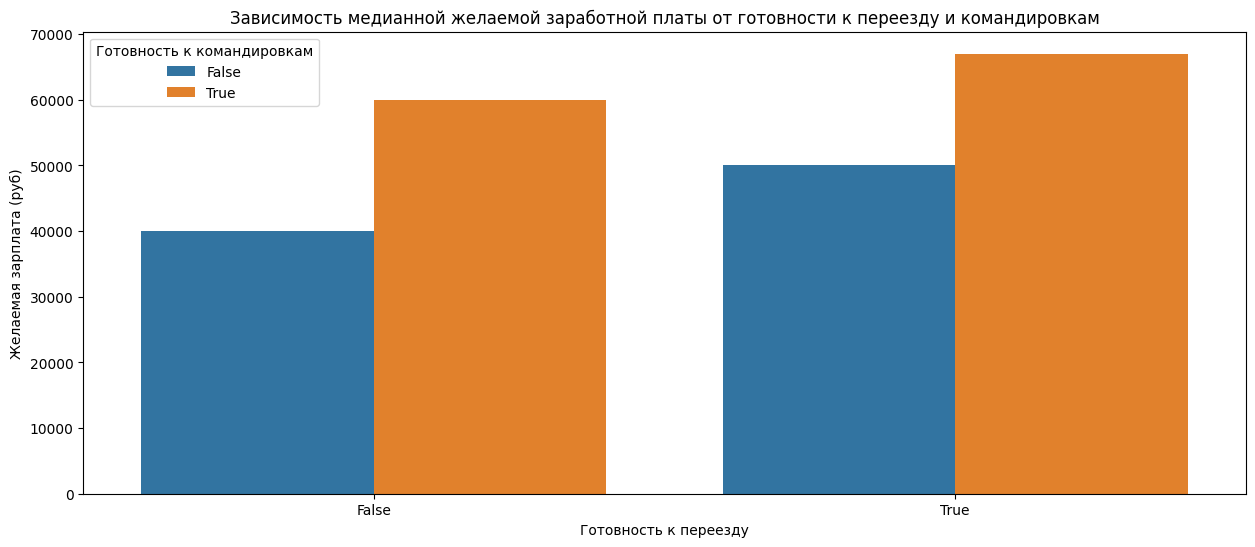

In [347]:
# Группировка данных по 'Готовность к переезду' и 'Готовность к командировкам',
# расчет медианной зарплаты для каждой группы
median_salary_relocation = df_hh_list.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()
print(median_salary_relocation)
# Построение столбчатой диаграммы ззависимости медианной желаемой заработной платы от готовности к переезду и командировкам
plt.figure(figsize=(15, 6))
sns.barplot(x='Готовность к переезду', y='ЗП (руб)', hue='Готовность к командировкам', data=median_salary_relocation)
plt.title('Зависимость медианной желаемой заработной платы от готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Желаемая зарплата (руб)')
plt.legend(title='Готовность к командировкам')
plt.show()




### Выводы по графику "Зависимость медианной желаемой заработной платы от готовности к переезду и командировкам"

1. Наблюдается явнвя положительная зависимость, запрашиваемой заработной платы, от готовности к переездам и командировкам. У специалистов не готовых к переездам и командировкам уровень зарплаты минимален 40 000 Р в то время, как у тех, кто готов и к тому и другому - максимален 67 000 Р.
2. У специалистов, готовых к переезду, зарплатные ожидания выше ~ 7 000 - 10 000 P, чем у тех, кто не готов, готовность к командировкам прибавляет к ожидаемым зарплатам от 17 000 до 20 000 Р.


7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

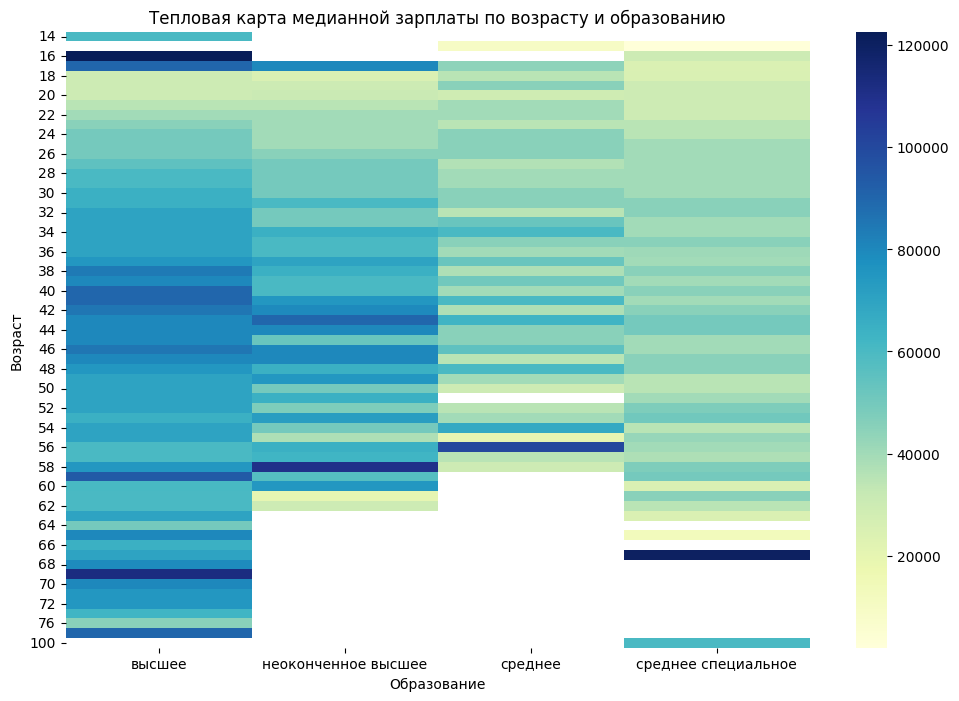

In [349]:
# Создаем сводную таблицу
pivot_table = df_hh_list.pivot_table(values='ЗП (руб)', index='Возраст', columns='Образование', aggfunc='median')

# Строим тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', fmt='.0f')  # Добавляем заголовок и подписи осей
plt.title('Тепловая карта медианной зарплаты по возрасту и образованию')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.show()

### Анализ тепловой карты медианной зарплаты по возрасту и образованию

1. Для соискателей с высшим и в несколько меньшей степени неоконченным высшим образованием характерен быстрый рост зарплатных ожиданий, начиная с возраста 20 - 22 лет, который достигает максимума к 40 - 45 годам, после чего имеет небольшую тенденцию к снижению,
в то же время для категорий среднее и среднее специальное зарплатные ожидания с возрастом почти не имеют тенденции к изменению, оставаясь приблизительно на одном и том же уровне.

2  бю 
6,0329*878. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

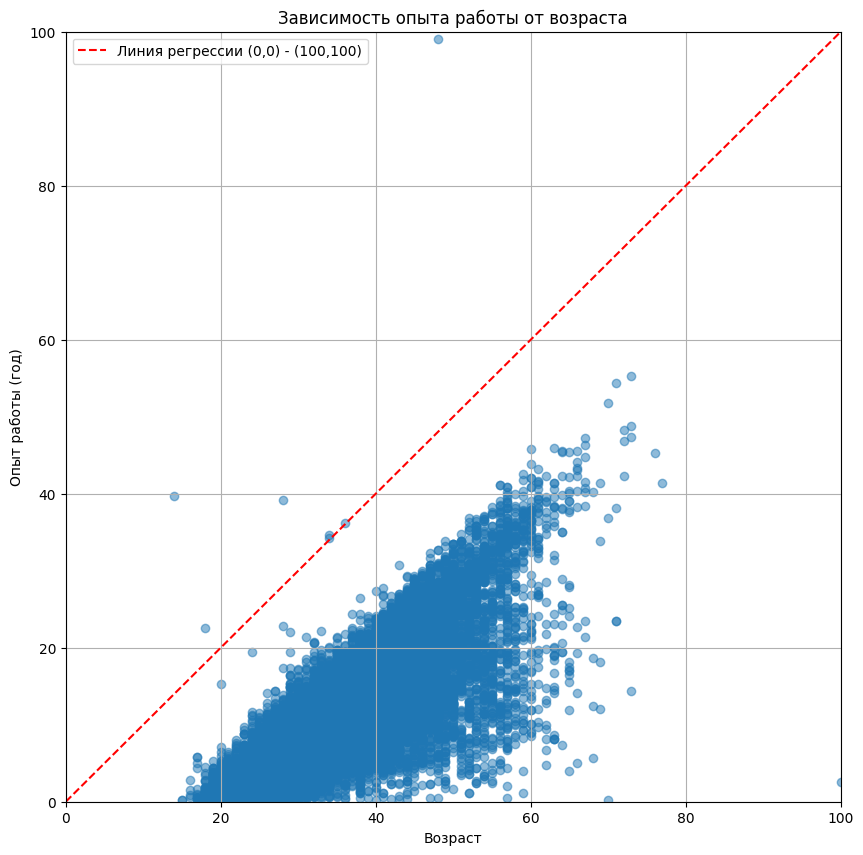

Количество точек выше красной линии: 7
Количество соискателей, у которых опыт работы отличается от возраста менее чем на 12 лет: 23


In [351]:
# Преобразование опыта работы из месяцев в года
df_hh_list['Опыт работы (год)'] = df_hh_list['Опыт работы (месяц)'] / 12
# Построение диаграммы рассеяния для визуализации зависимости между возрастом и  опытом работы
plt.figure(figsize=(10, 10))
plt.scatter(df_hh_list['Возраст'], df_hh_list['Опыт работы (год)'], alpha=0.5)
plt.title('Зависимость опыта работы от возраста')
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (год)')
plt.xlim(0, 100)  # Ограничиваем ось X от 0 до 100
plt.ylim(0, 100)  # Ограничиваем ось Y от 0 до 100
plt.grid(True)

# Добавляем линию регрессии (0,0) - (100,100)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Линия регрессии (0,0) - (100,100)')
plt.legend()
plt.show()
# Количество точек выше красной линии
points_above_line = len(df_hh_list[(df_hh_list['Опыт работы (год)'] > df_hh_list['Возраст']) & (df_hh_list['Возраст'] < 100)])
print(f"Количество точек выше красной линии: {points_above_line}")
# Количество соискателей у которых опыт работы отличается от возраста менее чем на 12 лет
points_ten_years = len(df_hh_list[(df_hh_list['Опыт работы (год)'] > df_hh_list['Возраст'] - 12)])
print(f"Количество соискателей, у которых опыт работы отличается от возраста менее чем на 12 лет: {points_ten_years}")






ваши выводы здесь

### Выводы по графику "Зависимость опыта работы от возраста"

1. В целом у подавляющего количества соискателей опыт работы и возраст укладываются в разницу 16 - 18 лет + (т.е. начало трудового стажа у большинства начинается с этого и старше возраста).
2. Найдено 7 явных аномалий, где трудовой стаж превышает возраст соискателя.
3. Дополнительно проведён анализ и найдено ещё 16 человек, у которых стаж и возраст отличаются менее чем на 12 лет. Однозначно списывать такие события в аномалии я бы не стал, так как есть вероятность того, что человек напрмер служил в армии в условиях крайнего севера или принимал участие в беовых действиях, где стаж считается год за два или даже три.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


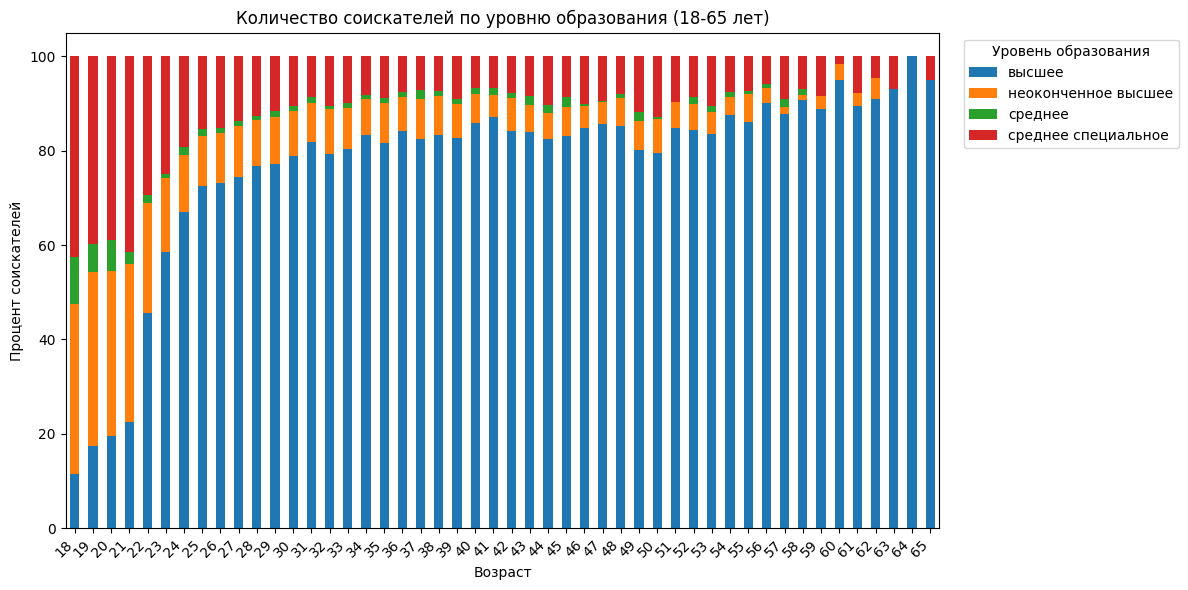

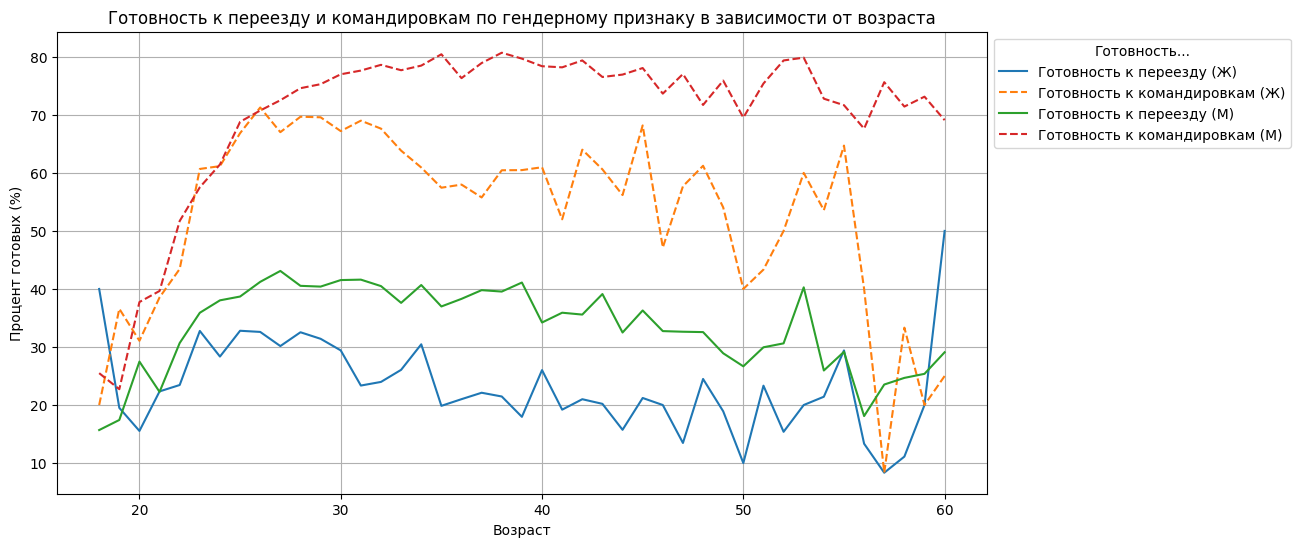

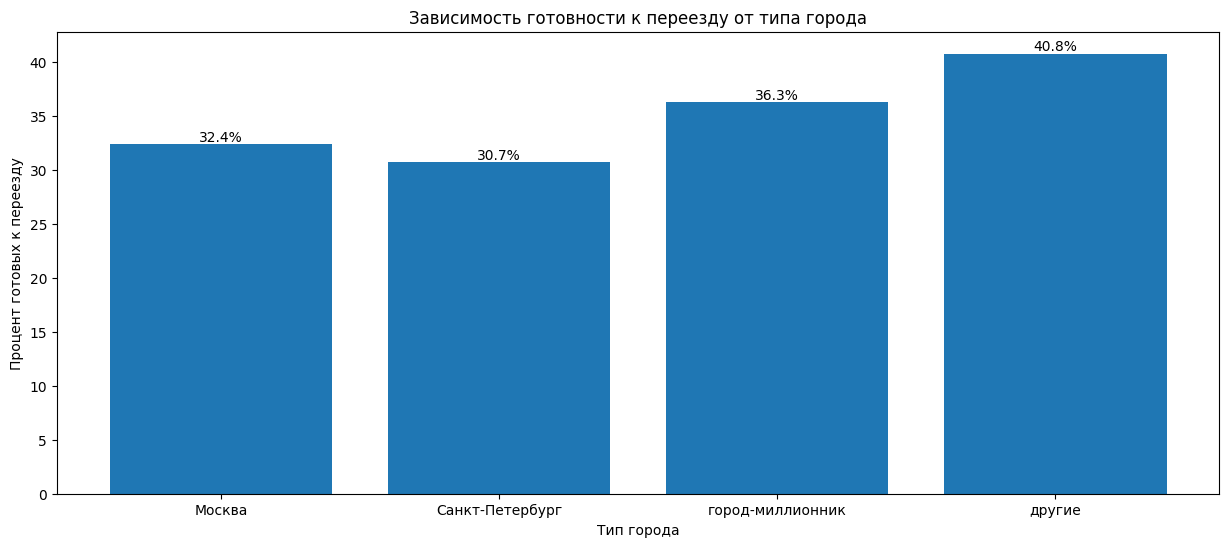

In [352]:
# График отношения количества соискателей к возрасту и уровню образования
# Фильтрация возраста соискателей от 18 до 65 лет

filtered_df = df_hh_list[(df_hh_list['Возраст'] >= 18) & (df_hh_list['Возраст'] <= 65)]

# Группировка данных по 'Возраст' и 'Образование', подсчет количества соискателей в каждой категории
age_education_counts = filtered_df.groupby(['Возраст', 'Образование']).size().unstack(fill_value=0)

# Подсчёт процентов по каждому возрасту для каждого уровня образования
age_education_percentages = age_education_counts.div(age_education_counts.sum(axis=1), axis=0) * 100

# CПостроение графика
ax = age_education_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Количество соискателей по уровню образования (18-65 лет)')
plt.xlabel('Возраст')
plt.ylabel('Процент соискателей')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Уровень образования', bbox_to_anchor=(1.02, 1), loc='upper left')  # Вынос легенды за пределы графика
plt.tight_layout()
plt.show()


# График отношения готовности к переезду и командировкам к возрасту и гендерному признаку
# фильтрация возраста соискателей от 18 до 60 лет
filtered_df = df_hh_list[(df_hh_list['Возраст'] >= 18) & (df_hh_list['Возраст'] <= 60)]

# группировка данных по 'Возраст' и 'Пол', подсчет среднего значения готовности к переезду и командировкам
grouped = filtered_df.groupby(['Возраст', 'Пол'])[['Готовность к переезду', 'Готовность к командировкам']].mean() * 100
grouped = grouped.reset_index()


plt.figure(figsize=(12, 6))

for gender in grouped['Пол'].unique():
    subset = grouped[grouped['Пол'] == gender]
    plt.plot(subset['Возраст'], subset['Готовность к переезду'], label=f'Готовность к переезду ({gender})')
    plt.plot(subset['Возраст'], subset['Готовность к командировкам'], label=f'Готовность к командировкам ({gender})', linestyle='--')

plt.xlabel('Возраст')
plt.ylabel('Процент готовых (%)')
plt.title('Готовность к переезду и командировкам по гендерному признаку в зависимости от возраста')
plt.legend(title='Готовность...', bbox_to_anchor=(1, 1), loc='upper left') # Вынос легенды за пределы графика
plt.grid(True)
plt.show()

# График зависимости готовности к переезду от типа города

# Расчёт процента людей, желающих переехать, для каждого типа города
relocation_by_city = df_hh_list.groupby('Город')['Готовность к переезду'].mean() * 100

# Создание графика
plt.figure(figsize=(15, 6))
plt.bar(relocation_by_city.index, relocation_by_city.values)

# Добавление процентного значения над столбцами
for i, v in enumerate(relocation_by_city.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')


plt.xlabel('Тип города')
plt.ylabel('Процент готовых к переезду')
plt.title('Зависимость готовности к переезду от типа города')
plt.show()

### Выводы по графику "Количество соискателей по уровню образования (18-65 лет)"

1. Как видно до 25 лет доля соискателей без высшего образования имеет ещё существенный вес, но после высшее образование выходит на уровень 70 - 75% и далее продолжает медленно расти, достигая к 40 годам 80%, а к 50 - 60 ещё немного выше.
2. Данный график помогает объяснить почему общие показатели по зарплатам сосикателей (медиана, квантили) почти совпадают с аналогичными показателями для распределения зарплат для специалистов с высшим образованием.

### Выводы по графику "Готовность к переезду и командировкам по гендерному признаку в зависимости от возраста"

1. Мужчины более "динамичны" и выражают большую готовность к перемене мест, как к перезду, так и к командировкам, причем с возрастом эта разница только усиливается. Причины понятны - женщина хранитель семьи...
2. Готовность к командировкам у мужчин к 30 годам достигает максимума и в дальнейшем с возрастом практически не меняется.
3. Готовность к переезду и у мужчин и у женщин к 30 годам достигает максимума и далее постепенно снижается, при этом мужчины в этом плане на 10 - 15% активнее.

### Выводы по графику "Зависимость готовности к переезду от типа города"

1. В целом процент желающих переехать по всем типам городов укладывается в 30 - 40%, но в городах милионниках и в большей степени "других" эта цифра выше, чем в Москве и Санкт-Петербурге.


In [353]:
df_hh_list.shape

(44744, 25)

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [354]:
# Поиск и удаление дубликатов в датафрейме
duplicate_rows = df_hh_list[df_hh_list.duplicated(keep=False)]
num_duplicates = len(duplicate_rows)
df_hh_list = df_hh_list.drop_duplicates()

print(f"Количество найденных дубликатов резюме: {num_duplicates}")
df_hh_list.shape



Количество найденных дубликатов резюме: 322


(44583, 25)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [355]:
# Вывод количества пропусков в каждом столбце
df_hh_list.isnull().sum()
df_hh_list.info(25)  # Вывод информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
Index: 44583 entries, 0 to 44743
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44583 non-null  object 
 1   Ищет работу на должность:        44583 non-null  object 
 2   Последнее/нынешнее место работы  44582 non-null  object 
 3   Последняя/нынешняя должность     44581 non-null  object 
 4   Обновление резюме                44583 non-null  object 
 5   Авто                             44583 non-null  object 
 6   Образование                      44583 non-null  object 
 7   Пол                              44583 non-null  object 
 8   Возраст                          44583 non-null  int64  
 9   Опыт работы (месяц)              44415 non-null  float64
 10  Город                            44583 non-null  object 
 11  Готовность к переезду            44583 non-null  bool   
 12  Готовность к командиров

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [356]:
# удаление строк, где есть пропуски в столбцах 'Последнее/нынешнее место работы'и 'Последняя/нынешняя должность'
df_hh_list = df_hh_list.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# расчёт медианного значения опыта работы "Опыт работы (месяц)" и "Опыт работы (год)" по не пустым значениям
median_experience_months = df_hh_list['Опыт работы (месяц)'].median()
median_experience_years = df_hh_list['Опыт работы (год)'].median()

# Заполнение пропусков в столбце 'Опыт работы (месяц)/(год)' медианным значением
df_hh_list['Опыт работы (месяц)'].fillna(median_experience_months, inplace=True)
df_hh_list['Опыт работы (год)'].fillna(median_experience_years, inplace=True)

# Расчет среднего значения 'Опыт работы (месяц)' и 'Опыт работы (год)' после заполнения пропусков
mean_experience_months = df_hh_list['Опыт работы (месяц)'].mean()
mean_experience_years = df_hh_list['Опыт работы (год)'].mean()

print(f"Средний опыт работы (месяц): {mean_experience_months:.0f} месяцев")
df_hh_list.shape





Средний опыт работы (месяц): 114 месяцев


D:\Temp\ipykernel_19300\3778954890.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



D:\Temp\ipykernel_19300\3778954890.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=

(44581, 25)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [357]:
initial_count = len(df_hh_list)  # Количество строк до удаления

# удаление строк, где 'ЗП (руб)' >= 1 000 000 or <= 1 000
df_hh_list = df_hh_list[(df_hh_list['ЗП (руб)'] <= 1000000) & (df_hh_list['ЗП (руб)'] >= 1000)]

# расчет количества удаленных строк
removed_count = initial_count - len(df_hh_list)
print(f"Количество удаленных строк: {removed_count}")



df_hh_list.shape

Количество удаленных строк: 89


(44492, 25)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [358]:
#  Find resumes where work experience exceeds age.
over_experience = df_hh_list[df_hh_list['Опыт работы (месяц)'] > df_hh_list['Возраст'] * 12]
print(f"Количество резюме, где опыт работы превышает возраст: {len(over_experience)}")
# Удаление строк, где опыт работы превышает возраст
df_hh_list = df_hh_list[df_hh_list['Опыт работы (месяц)'] <= df_hh_list['Возраст'] * 12]
df_hh_list.shape  # Выводит количество строк и столбцов в таблице после обработки данных

Количество резюме, где опыт работы превышает возраст: 7


(44485, 25)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

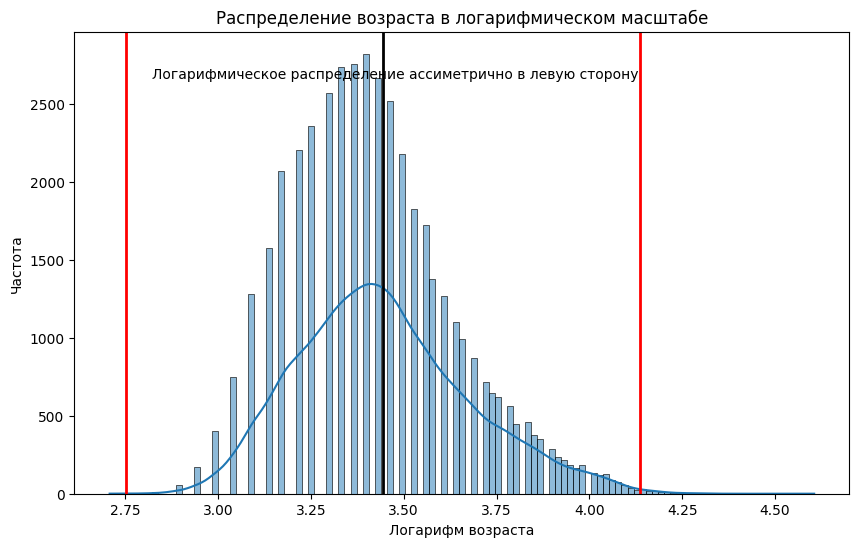

Количество выбросов по возрасту: 3
Количество оставшихся строк после удаления выбросов: 44482


In [359]:
# # Логарифмическое распределение возраста
log_age = np.log(df_hh_list['Возраст'])

# Построение гистограммы в логарифмическом масштабе
plt.figure(figsize=(10, 6))
histplot = sns.histplot(log_age, kde=True)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 3 * log_age.std(), color='r', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='r', lw=2)
plt.title('Распределение возраста в логарифмическом масштабе')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.text(x = 0.1, y = 0.9, s = 'Логарифмическое распределение ассиметрично в левую сторону', transform = histplot.transAxes, fontsize = 10)
plt.show()

# Находим выбросы с помощью метода z-отклонения 3 сигмы в левую сторону, 4 сигмы в правую сторону
def outliers_z_score(data, feature, left, right, log_scale=False):
    """
    Находит выбросы в данных с помощью z-отклонения.

    Args:
        data: Данные для анализа.
        feature: Столбец, в котором нужно найти выбросы.
        left: Количество стандартных отклонений для левой границы.
        right: Количество стандартных отклонений для правой границы.
        log_scale: Если True, применяет логарифмическое преобразование к данным.

    Returns:
        Индексы выбросов и очищенные данные.
    """
    if log_scale:
        x = np.log(data[feature] + 1)  # Добавляем 1, чтобы избежать логарифма нуля
    else:
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned_data = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned_data
outliers, cleaned_data = outliers_z_score(df_hh_list, 'Возраст', 3, 4, log_scale=True)
# Выводим количество выбросов по возрасту
print(f"Количество выбросов по возрасту: {outliers.shape[0]}")
# Выводим количество оставшихся строк после удаления выбросов
print(f"Количество оставшихся строк после удаления выбросов: {cleaned_data.shape[0]}")


ваш коммментарий здесь